In [168]:
# This script is designed to obtain accuracy of callers for each dataset D1-D6, as well as overall accuracy

# PROGRESS:
# D1: done
# D2: done
# D3: done
# D4: done
# D5: done
# D6: done

# SETUP - run only once

In [11]:
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2


#from google.colab import drive
#drive.mount('/content/gdrive')

caller_list = list() # holds names of all callers
twodig_list = list() # holds 2dig accuracies of all callers
fourdig_list = list() # holds 4dig accuracies of all callers

# Determining accuracy - run once per caller

# Functions

## D1

In [51]:
def d1_accuracy(caller_name):
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
  # D1 Accuracy

  dir_1 =  root1+"1_gs.csv"
  dir_2 =  root2+'_d1.csv'
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,len(g)):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])


  numsamples += len(gold_set)


  # 4 digit resolution
  hit = 0
  #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
  for i in range(0,len(gold_set)):
    try:
      if gold_set[i] == pred_set[i]:
        hit +=1 
      elif pred_set[i] == gold_set[i-1]:
        hit += 1
      elif pred_set[i] == gold_set[i+1]:
        hit += 1
    except:
      pass

  #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
  #print(hit,len(gold_set))
  four_dig=hit*100/len(gold_set)
  fourdig = fourdig + hit

  # 2 digit resolution
  hit = 0
  for i in range(0,len(gold_set)):
    if gold_set[i][0:4] == pred_set[i][0:4]:
      hit +=1 
    elif pred_set[i][0:4] == gold_set[i-1][0:4]:
      hit += 1
    elif pred_set[i][0:4] == gold_set[i+1][0:4]:
      hit += 1

  #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
  #print(hit,len(gold_set))
  two_dig = hit*100/len(gold_set)
  twodig = twodig + hit
  return caller_name,four_dig,two_dig



## D2

### Class 1

In [2]:
def d2_class1_accuracy(caller_name):
  # Run for D2 accuracy 4 dig res
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,6):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])

  numsamples += len(gold_set)
  # 4 digit resolution
  hit4 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(gold_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:7] for elem in allele_list_next)

        #print(allele_list_curr)

        if pred_set[i] in allele_list_curr:
          hit4 +=1 
        elif pred_set[i] in allele_list_prev:
          hit4 += 1
        elif pred_set[i] in allele_list_next:
          hit4 += 1
      else:
        if gold_set[i][0:7] == pred_set[i]:
          hit4 +=1 
        elif pred_set[i] == gold_set[i-1][0:7]:
          hit4 += 1
        elif pred_set[i] == gold_set[i+1][0:7]:
          hit4 += 1
    except:
      pass

  #print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
  #print(hit4,len(pred_set))
  four_dig=hit4*100/len(gold_set)
  fourdig = fourdig + hit4

    # Run for D2 accuracy 2 dig res


  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:4])

    for k in range(0,6):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])

  #numsamples += len(gold_set)
  # 2 digit resolution
  hit2 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(pred_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:4] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:4] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:4] for elem in allele_list_next)

        if pred_set[i][0:4] in allele_list_curr:
          hit2 +=1 
        elif pred_set[i][0:4] in allele_list_prev:
          hit2 += 1
        elif pred_set[i][0:4] in allele_list_next:
          hit2 += 1
      else:
        if gold_set[i][0:4] == pred_set[i][0:4]:
          hit2 +=1 
        elif pred_set[i][0:4] == gold_set[i-1][0:4]:
          hit2 += 1
        elif pred_set[i][0:4] == gold_set[i+1][0:4]:
          hit2 += 1
    except:
      pass

  #print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
  #print(hit2,len(gold_set))
  twodig = twodig + hit2
  two_dig=hit2*100/len(gold_set)
  return caller_name,four_dig,two_dig



### Class II

In [4]:
def d2_class2_accuracy(caller_name):
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
      
  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)
  #if pre.columns.str.contains('DQB1').any():
  # col_selector='DRB1|DQB1'
  #else:
  # col_selector='DRB1'
  gs=gs.set_index(gs.columns[0])
  mask = gs.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  gs=gs.loc[: , mask]
  gs=gs.reset_index()
  gs=gs.fillna('DRB1*00:00')


  pre=pre.set_index(pre.columns[0])
  mask = pre.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  pre=pre.loc[: , mask]
  pre=pre.reset_index()
  pre=pre.fillna('DRB1*00:00')

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:10])

    if len(g) != len(p):
      for k in range(0,len(g)):
        gold_set.append(g[k])
      for k in range(0,len(p)):
        pred_set.append(p[k])

    else:  
      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


  numsamples += len(gold_set)
  # 4 digit resolution
  hit4 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(gold_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:10] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:10] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:10] for elem in allele_list_next)

        #print(allele_list_curr)

        if pred_set[i] in allele_list_curr:
          #print(pred_set[i],allele_list_curr)
          hit4 +=1 
        elif pred_set[i] in allele_list_prev:
          #print(pred_set[i],allele_list_prev)
          hit4 += 1
        elif pred_set[i] in allele_list_next:
          #print(pred_set[i],allele_list_next)
          hit4 += 1
      else:
        if gold_set[i][0:10] == pred_set[i]:
          #print(pred_set[i],gold_set[i][0:10])
          hit4 +=1 
        elif pred_set[i] == gold_set[i-1][0:10]:
          #print(pred_set[i],gold_set[i-1][0:10])
          hit4 += 1
        elif pred_set[i] == gold_set[i+1][0:10]:
          #print(pred_set[i],gold_set[i+1][0:10])
          hit4 += 1
      #print(pred_set[i],gold_set[i][0:10])
    except:
      pass

  #print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
  #print(hit4,len(pred_set))
  fourdig = fourdig + hit4
  four_dig=hit4*100/len(gold_set)
  # Run for D2 accuracy 2 dig res


  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)
  #if pre.columns.str.contains('DQB1').any():
  # col_selector='DRB1|DQB1'
  ## col_selector='DRB1'

  gs=gs.set_index(gs.columns[0])
  mask = gs.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  gs=gs.loc[: , mask]
  gs=gs.reset_index()
  gs=gs.fillna('DRB1*00:00')
  pre=pre.set_index(pre.columns[0])
  mask = pre.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  pre=pre.loc[: , mask]
  pre=pre.reset_index()
  pre=pre.fillna('DRB1*00:00')
  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,len(g)):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])


  #numsamples += len(gold_set)
  # 2 digit resolution
  hit2 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(pred_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:7] for elem in allele_list_next)

        if pred_set[i][0:7] in allele_list_curr:
          hit2 +=1 
        elif pred_set[i][0:7] in allele_list_prev:
          hit2 += 1
        elif pred_set[i][0:7] in allele_list_next:
          hit2 += 1
      else:
        if gold_set[i][0:7] == pred_set[i][0:7]:
          hit2 +=1 
        elif pred_set[i][0:7] == gold_set[i-1][0:7]:
          hit2 += 1
        elif pred_set[i][0:7] == gold_set[i+1][0:7]:
          hit2 += 1
    except:
      pass

  #print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
  #print(hit2,len(gold_set))
  twodig = twodig + hit2
  two_dig=hit2*100/len(pred_set)
  return caller_name,four_dig,two_dig

In [7]:
d2_class2_accuracy('seq2hla')

IndexError: list index out of range

## D3

In [47]:
def d3_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # D3 Accuracy

    dir_1 =  root1+"3_gs.csv"
    dir_2 =  root2+"_d3.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    pre=pre.fillna('DRB1*00:00')
    #pre=pre.dropna()
    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions = pre[pre.columns[0]].to_list()

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    # constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = []
    pred_set = []

    for i in range(0,len(goldstandard)):
      try:
        g = goldstandard[i][1:7]
        p_raw = prediction[index_list[i]][1:7]
        p = list()
      except: 
        pass
      
      for i in p_raw:
        p.append(i[0:10])

      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


    numsamples += len(gold_set)


    # 4 digit resolution
    hit = 0
    #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i] == pred_set[i]:
          hit +=1 
        elif pred_set[i] == gold_set[i-1]:
          hit += 1
        elif pred_set[i] == gold_set[i+1]:
          hit += 1
      except:
        pass

    #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
    #print(hit,len(gold_set))
    fourdig = fourdig + hit
    four_dig=hit*100/len(gold_set)

    # 2 digit resolution
    hit = 0
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i][0:7] == pred_set[i][0:7]:
          hit +=1 
        elif pred_set[i][0:7] == gold_set[i-1][0:7]:
          hit += 1
        elif pred_set[i][0:7] == gold_set[i+1][0:7]:
          hit += 1
      except:
        pass
      
    #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
    #print(hit,len(gold_set))
    two_dig = hit*100/len(gold_set)
    twodig = twodig + hit
    return caller_name,four_dig,two_dig


## D4

In [46]:
def d4_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # D4 Accuracy DRB1 Only

    dir_1 =  root1+"4_gs.csv"
    dir_2 =  root2+"_d4.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    pre=pre.fillna('DRB1*00:00')
    #pre=pre.dropna()
    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions = pre[pre.columns[0]].to_list()

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    # constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = []
    pred_set = []

    for i in range(0,len(goldstandard)):
      try:
        g = goldstandard[i][1:7]
        p_raw = prediction[index_list[i]][1:7]
        p = list()
      except: 
        pass
      
      for i in p_raw:
        p.append(i[0:10])

      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


    numsamples += len(gold_set)


    # 4 digit resolution
    hit = 0
    #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i] == pred_set[i]:
          hit +=1 
        elif pred_set[i] == gold_set[i-1]:
          hit += 1
        elif pred_set[i] == gold_set[i+1]:
          hit += 1
      except:
        pass

    #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
    #print(hit,len(gold_set))
    fourdig = fourdig + hit
    four_dig=hit*100/len(gold_set)

    # 2 digit resolution
    hit = 0
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i][0:7] == pred_set[i][0:7]:
          hit +=1 
        elif pred_set[i][0:7] == gold_set[i-1][0:7]:
          hit += 1
        elif pred_set[i][0:7] == gold_set[i+1][0:7]:
          hit += 1
      except:
        pass
      
    #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
    #print(hit,len(gold_set))
    two_dig = hit*100/len(gold_set)
    twodig = twodig + hit
    return caller_name,four_dig,two_dig



## D5

In [45]:
def d5_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # Run for d5 accuracy: monoallelic A and B only 
    # i just brute force this for now because there are only 4 samples 

    dir_1 =  root1+"5_gs.csv"
    dir_2 =  root2+"_d5.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('A|B').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()

    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions_raw = pre[pre.columns[0]].to_list()
    pre_accessions = list()
    for i in pre_accessions_raw:
      pre_accessions.append(i[0:10])

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    numsamples += len(index_list)

    # constructing standardized, stripped list of all alleles 
    prediction = pre.values
    pred_set = []

    for i in range(0,len(index_list)):
      p_raw = prediction[index_list[i]][1:5]
      for i in p_raw:
        try: pred_set.append(i[0:7])
        except: pred_set.append('Z*00:00')


    #sample 1
    if (pred_set[0][0:7] == 'A*29:02') or pred_set[1][0:7] == 'A*29:02':
      fourdig_hit +=1 
    if (pred_set[0][0:4] == 'A*29') or pred_set[1][0:4] == 'A*29':
      twodig_hit +=1 

    #sample 2
    if (pred_set[6][0:7] == 'B*51:01') or pred_set[7][0:7] == 'B*51:01':
      fourdig_hit += 1
    if (pred_set[6][0:4] == 'B*51') or pred_set[7][0:4] == 'B*51':
      twodig_hit += 1

    #sample 3
    if (pred_set[10][0:7] == 'B*54:01') or pred_set[11][0:7] == 'B*54:01':
      fourdig_hit += 1
    if (pred_set[10][0:4] == 'B*54') or pred_set[11][0:4] == 'B*54':
      twodig_hit += 1

    #sample 4
    if (pred_set[14][0:7] == 'B*57:01') or pred_set[15][0:7] == 'B*57:01':
      fourdig_hit += 1
    if (pred_set[14][0:4] == 'B*57') or pred_set[15][0:4] == 'B*57':
      twodig_hit += 1
          

    #print('4 Digit Accuracy is :' , fourdig_hit*100/4, ' %')
    #print(fourdig_hit,4)
    fourdig = fourdig + fourdig_hit
    four_dig=fourdig_hit*100/4

    #print('2 Digit Accuracy is :' , twodig_hit*100/4, ' %')
    #print(twodig_hit,4)
    two_dig = twodig_hit*100/4
    twodig = twodig + twodig_hit
    return caller_name,four_dig,two_dig

## D6

In [44]:
def d6_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # run for d6 accuracy: monoallelic C only

    dir_1 =  root1+"6_gs.csv"
    dir_2 =  root2+"_d6.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('C').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions_raw = pre[pre.columns[0]].to_list()
    pre_accessions = list()
    for i in pre_accessions_raw:
      pre_accessions.append(i[0:10])

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    numsamples += len(index_list)

    # constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = gs[gs.columns[1]].to_list();
    pred_set = []

    for i in range(0,len(index_list)):
      p_raw = prediction[index_list[i]][1:3] #select C alleles only
      for i in p_raw:
        try: pred_set.append(i[0:7])
        except: pred_set.append('Z*00:00')



    for i in range(8):
      if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
        fourdig_hit +=1 
      if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
        twodig_hit +=1 

    #print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
    #print(fourdig_hit,8)
    four_dig=fourdig_hit*100/len(gold_set)
    fourdig = fourdig + fourdig_hit

    #print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
    two_dig = twodig_hit*100/len(gold_set)
    #print(twodig_hit,8)
    twodig = twodig + twodig_hit
    return caller_name,four_dig,two_dig

# New Way

## D1

In [95]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d1_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df1=pd.DataFrame(scores,columns=col_names)
df1


,Tool,4 Digit,2 Digit
0,arcas,68.333333,97.666667
1,hlaforest,85.666667,96.666667
2,hlavbseq,88.666667,97.666667
3,optitype,94.666667,97.333333
4,phlat,83.666667,95.666667
5,rna2hla,92.333333,97.666667
6,seq2hla,92.333333,97.666667


## D2

### Class 1 

In [87]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d2_class1_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df2_class1=pd.DataFrame(scores,columns=col_names)
df2_class1

,Tool,4 Digit,2 Digit
0,arcas,94.557823,99.557823
1,hlaforest,82.312925,98.639456
2,hlavbseq,89.897959,98.231293
3,optitype,98.673469,99.659864
4,phlat,89.013605,97.687075
5,rna2hla,96.530612,99.013605
6,seq2hla,96.530612,99.013605


### Class 2

In [88]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d2_class2_accuracy(i)   
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df2_class2=pd.DataFrame(scores,columns=col_names)
df2_class2

,Tool,4 Digit,2 Digit
0,arcas,97.244898,99.795918
1,hlaforest,91.326531,99.897959
2,hlavbseq,9.897959,0.000000
3,phlat,91.836735,98.469388
4,rna2hla,92.755102,96.020408
5,seq2hla,92.755102,96.020408


## D3

In [89]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d3_accuracy(i)   
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df3=pd.DataFrame(scores,columns=col_names)
df3

,Tool,4 Digit,2 Digit
0,arcas,97.093023,100.000000
1,hlaforest,86.046512,100.000000
2,hlavbseq,55.813953,59.302326
3,phlat,93.023256,100.000000
4,rna2hla,76.744186,92.441860
5,seq2hla,43.604651,58.139535


## D4

In [90]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d4_accuracy(i)   
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df4=pd.DataFrame(scores,columns=col_names)
df4

,Tool,4 Digit,2 Digit
0,arcas,14.285714,14.285714
1,hlaforest,46.428571,75.000000
2,hlavbseq,10.714286,10.714286
3,phlat,50.000000,53.571429
4,rna2hla,32.142857,42.857143
5,seq2hla,32.142857,42.857143


## D5

In [91]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d5_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df5=pd.DataFrame(scores,columns=col_names)
df5

,Tool,4 Digit,2 Digit
0,arcas,100.0,100.0
1,hlaforest,50.0,100.0
2,hlavbseq,100.0,100.0
3,optitype,100.0,100.0
4,phlat,100.0,100.0
5,rna2hla,75.0,100.0
6,seq2hla,75.0,100.0


## D6

In [92]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d6_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit']
df6=pd.DataFrame(scores,columns=col_names)
df6

,Tool,4 Digit,2 Digit
0,arcas,100.0,100.0
1,hlaforest,100.0,100.0
2,hlavbseq,100.0,100.0
3,optitype,100.0,100.0
4,phlat,100.0,100.0
5,rna2hla,75.0,100.0
6,seq2hla,75.0,100.0


# Old Way

## Setup

In [8]:
caller_name = input('What is name of caller ')
root1 = '../datasets/'
root2 = '../results/standard/{}'.format(caller_name)
fourdig = 0
twodig = 0
numsamples = 0

## Dataset 1

In [53]:
# D1 Accuracy

dir_1 =  root1+"1_gs.csv"
dir_2 =  root2+'_d1.csv'
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
print(hit,len(gold_set))
four_dig=hit*100/len(pred_set)
fourdig = fourdig + hit

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1

print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
print(hit,len(gold_set))
two_dig = hit*100/len(pred_set)
twodig = twodig + hit



4 Digit Accuracy is : 68.33333333333333  %
205 300
2 Digit Accuracy is : 97.66666666666667  %
293 300


In [55]:
d1_accuracy('arcas')

('arcas', 68.33333333333333, 97.66666666666667)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 2

### Class 1

#### 4 Digit Res

In [56]:
# Run for D2 accuracy 4 dig res

dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,6):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

numsamples += len(gold_set)
# 4 digit resolution
hit4 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(gold_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:7] for elem in allele_list_next)

      #print(allele_list_curr)

      if pred_set[i] in allele_list_curr:
        hit4 +=1 
      elif pred_set[i] in allele_list_prev:
        hit4 += 1
      elif pred_set[i] in allele_list_next:
        hit4 += 1
    else:
      if gold_set[i][0:7] == pred_set[i]:
        hit4 +=1 
      elif pred_set[i] == gold_set[i-1][0:7]:
        hit4 += 1
      elif pred_set[i] == gold_set[i+1][0:7]:
        hit4 += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
print(hit4,len(pred_set))
fourdig = fourdig + hit4


4 Digit Accuracy is : 94.5578231292517  %
2780 2940


#### 2 Digit Res

In [57]:
# Run for D2 accuracy 2 dig res


dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:4])

  for k in range(0,6):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

#numsamples += len(gold_set)
# 2 digit resolution
hit2 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(pred_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:4] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:4] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:4] for elem in allele_list_next)

      if pred_set[i][0:4] in allele_list_curr:
        hit2 +=1 
      elif pred_set[i][0:4] in allele_list_prev:
        hit2 += 1
      elif pred_set[i][0:4] in allele_list_next:
        hit2 += 1
    else:
      if gold_set[i][0:4] == pred_set[i][0:4]:
        hit2 +=1 
      elif pred_set[i][0:4] == gold_set[i-1][0:4]:
        hit2 += 1
      elif pred_set[i][0:4] == gold_set[i+1][0:4]:
        hit2 += 1
  except:
    pass

print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
print(hit2,len(gold_set))
twodig = twodig + hit2


2 Digit Accuracy is : 99.5578231292517  %
2927 2940


In [146]:
two_dig=hit2*100/len(pred_set)
four_dig=hit4*100/len(pred_set)
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

In [58]:
d2_class1_accuracy('arcas')

('arcas', 94.5578231292517, 99.5578231292517)

### Class 2

#### 4 Digit Res

In [10]:
# Run for D2 accuracy 4 dig res

dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
#if pre.columns.str.contains('DQB1').any():
 # col_selector='DRB1|DQB1'
#else:
 # col_selector='DRB1'
gs=gs.set_index(gs.columns[0])
mask = gs.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                axis=0)
gs=gs.loc[: , mask]
gs=gs.reset_index()
gs=gs.fillna('DRB1*00:00')


pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  if len(g) != len(p):
    for k in range(0,len(g)):
      gold_set.append(g[k])
    for k in range(0,len(p)):
      pred_set.append(p[k])

  else:  
    for k in range(0,len(g)):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])


numsamples += len(gold_set)
# 4 digit resolution
hit4 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(gold_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:10] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:10] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:10] for elem in allele_list_next)

      #print(allele_list_curr)

      if pred_set[i] in allele_list_curr:
        #print(pred_set[i],allele_list_curr)
        hit4 +=1 
      elif pred_set[i] in allele_list_prev:
        #print(pred_set[i],allele_list_prev)
        hit4 += 1
      elif pred_set[i] in allele_list_next:
        #print(pred_set[i],allele_list_next)
        hit4 += 1
    else:
      if gold_set[i][0:10] == pred_set[i]:
        #print(pred_set[i],gold_set[i][0:10])
        hit4 +=1 
      elif pred_set[i] == gold_set[i-1][0:10]:
        #print(pred_set[i],gold_set[i-1][0:10])
        hit4 += 1
      elif pred_set[i] == gold_set[i+1][0:10]:
        #print(pred_set[i],gold_set[i+1][0:10])
        hit4 += 1
    #print(pred_set[i],gold_set[i][0:10])
  except:
    pass

print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
print(hit4,len(pred_set))
fourdig = fourdig + hit4


4 Digit Accuracy is : 8.775510204081632  %
129 1470


#### 2 Digit Res

In [60]:
# Run for D2 accuracy 2 dig res


dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
#if pre.columns.str.contains('DQB1').any():
 # col_selector='DRB1|DQB1'
## col_selector='DRB1'

gs=gs.set_index(gs.columns[0])
mask = gs.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
gs=gs.loc[: , mask]
gs=gs.reset_index()
gs=gs.fillna('DRB1*00:00')
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


#numsamples += len(gold_set)
# 2 digit resolution
hit2 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(pred_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:7] for elem in allele_list_next)

      if pred_set[i][0:7] in allele_list_curr:
        hit2 +=1 
      elif pred_set[i][0:7] in allele_list_prev:
        hit2 += 1
      elif pred_set[i][0:7] in allele_list_next:
        hit2 += 1
    else:
      if gold_set[i][0:7] == pred_set[i][0:7]:
        hit2 +=1 
      elif pred_set[i][0:7] == gold_set[i-1][0:7]:
        hit2 += 1
      elif pred_set[i][0:7] == gold_set[i+1][0:7]:
        hit2 += 1
  except:
    pass

print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
print(hit2,len(gold_set))
twodig = twodig + hit2


2 Digit Accuracy is : 99.79591836734694  %
978 980


In [61]:
d2_class2_accuracy('arcas')

('arcas', 97.24489795918367, 99.79591836734694)

## Dataset 3

In [62]:
# D3 Accuracy

dir_1 =  root1+"3_gs.csv"
dir_2 =  root2+"_d3.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
#pre=pre.dropna()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
print(hit,len(gold_set))
fourdig = fourdig + hit
four_dig=hit*100/len(pred_set)

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i][0:7] == pred_set[i][0:7]:
      hit +=1 
    elif pred_set[i][0:7] == gold_set[i-1][0:7]:
      hit += 1
    elif pred_set[i][0:7] == gold_set[i+1][0:7]:
      hit += 1
  except:
    pass
  
print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
print(hit,len(gold_set))
two_dig = hit*100/len(pred_set)
twodig = twodig + hit


4 Digit Accuracy is : 97.09302325581395  %
167 172
2 Digit Accuracy is : 100.0  %
172 172


In [63]:
d3_accuracy('arcas')

('arcas', 97.09302325581395, 100.0)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 4

In [64]:
# D4 Accuracy DRB1 Only

dir_1 =  root1+"4_gs.csv"
dir_2 =  root2+"_d4.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
#pre=pre.dropna()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
print(hit,len(gold_set))
fourdig = fourdig + hit
four_dig=hit*100/len(pred_set)

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i][0:7] == pred_set[i][0:7]:
      hit +=1 
    elif pred_set[i][0:7] == gold_set[i-1][0:7]:
      hit += 1
    elif pred_set[i][0:7] == gold_set[i+1][0:7]:
      hit += 1
  except:
    pass
  
print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
print(hit,len(gold_set))
two_dig = hit*100/len(pred_set)
twodig = twodig + hit



4 Digit Accuracy is : 14.285714285714286  %
4 28
2 Digit Accuracy is : 14.285714285714286  %
4 28


In [65]:
d4_accuracy('arcas')

('arcas', 14.285714285714286, 14.285714285714286)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 5

In [66]:
# Run for d5 accuracy: monoallelic A and B only 
# i just brute force this for now because there are only 4 samples 

dir_1 =  root1+"5_gs.csv"
dir_2 =  root2+"_d5.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('A|B').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()

twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
prediction = pre.values
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:5]
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')


#sample 1
if (pred_set[0][0:7] == 'A*29:02') or pred_set[1][0:7] == 'A*29:02':
  fourdig_hit +=1 
if (pred_set[0][0:4] == 'A*29') or pred_set[1][0:4] == 'A*29':
  twodig_hit +=1 

#sample 2
if (pred_set[6][0:7] == 'B*51:01') or pred_set[7][0:7] == 'B*51:01':
  fourdig_hit += 1
if (pred_set[6][0:4] == 'B*51') or pred_set[7][0:4] == 'B*51':
  twodig_hit += 1

#sample 3
if (pred_set[10][0:7] == 'B*54:01') or pred_set[11][0:7] == 'B*54:01':
  fourdig_hit += 1
if (pred_set[10][0:4] == 'B*54') or pred_set[11][0:4] == 'B*54':
  twodig_hit += 1

#sample 4
if (pred_set[14][0:7] == 'B*57:01') or pred_set[15][0:7] == 'B*57:01':
  fourdig_hit += 1
if (pred_set[14][0:4] == 'B*57') or pred_set[15][0:4] == 'B*57':
  twodig_hit += 1
      

print('4 Digit Accuracy is :' , fourdig_hit*100/4, ' %')
print(fourdig_hit,4)
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/4, ' %')
print(twodig_hit,4)
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

4 Digit Accuracy is : 100.0  %
4 4
2 Digit Accuracy is : 100.0  %
4 4


In [67]:
d5_accuracy('arcas')

('arcas', 100.0, 100.0)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 6

In [68]:
# run for d6 accuracy: monoallelic C only

dir_1 =  root1+"6_gs.csv"
dir_2 =  root2+"_d6.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('C').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = gs[gs.columns[1]].to_list();
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:3] #select C alleles only
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')



for i in range(8):
  if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
    fourdig_hit +=1 
  if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
    twodig_hit +=1 

print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
print(fourdig_hit,8)
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
two_dig = twodig_hit*100/len(pred_set)
print(twodig_hit,8)
twodig = twodig + twodig_hit

4 Digit Accuracy is : 100.0  %
8 8
2 Digit Accuracy is : 100.0  %
8 8


In [69]:
d6_accuracy('arcas')

('arcas', 100.0, 100.0)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Final Accuracy Calculation

In [454]:
print(numsamples)
print(twodig)
print(fourdig)

twodigaccuracy = twodig/numsamples
fourdigaccuracy = fourdig/numsamples

print(twodigaccuracy)
print(fourdigaccuracy)

3140
1053
1122
0.33535031847133756
0.3573248407643312


In [455]:
caller_list.append(caller_name)
twodig_list.append(twodigaccuracy)
fourdig_list.append(fourdigaccuracy)

print(caller_list)
print(twodig_list)
print(fourdig_list)

['arcas', 'hlaforest', 'hlavbseq', 'phlat', 'rna2hla', 'seq2hla']
[0.44166666666666665, 0.5106481481481482, 0.3212962962962963, 0.8481481481481481, 0.9423728813559322, 0.33535031847133756]
[0.36064814814814816, 0.39305555555555555, 0.2324074074074074, 0.7583333333333333, 0.8898305084745762, 0.3573248407643312]


# Accuracy Plots

In [12]:
import seaborn as sns

## Overall Accuracy Plot

### Class 1

In [13]:
## Class 1 
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
twodig_list=[0.993849938499385, 0.9846248462484625, 0.9818573185731857, 0.9944649446494465, 0.9750922509225092, 0.988929889298893, 0.988929889298893]
fourdig_list=[0.9215867158671587, 0.826260762607626, 0.8982164821648216, 0.9830873308733087, 0.8856088560885609, 0.9606396063960639, 0.9606396063960639]

In [14]:
df_caller_list=caller_list
df_twodig_list=twodig_list
df_fourdig_list=fourdig_list
df_class1=pd.DataFrame(np.column_stack([df_caller_list,df_twodig_list,df_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df_class1=df_class1.melt(id_vars='Callers').rename(columns=str.title)
df_class1['Value'] = df_class1['Value'].astype(float)
df_class1['Class'] ='Class 1'

In [19]:
df_class1

,Callers,Variable,Value,Class
0,arcas,Two Digits,0.993850,Class 1
1,hlaforest,Two Digits,0.984625,Class 1
2,hlavbseq,Two Digits,0.981857,Class 1
3,optitype,Two Digits,0.994465,Class 1
4,phlat,Two Digits,0.975092,Class 1
5,rna2hla,Two Digits,0.988930,Class 1
6,seq2hla,Two Digits,0.988930,Class 1
7,arcas,Four Digit,0.921587,Class 1
8,hlaforest,Four Digit,0.826261,Class 1
9,hlavbseq,Four Digit,0.898216,Class 1


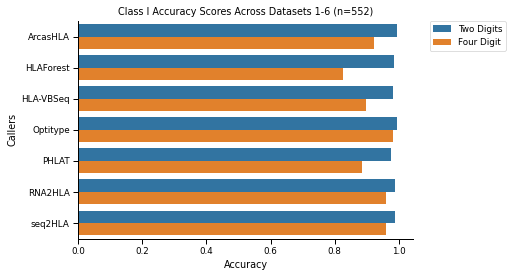

In [481]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Variable', data=df_class1)
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq', 'Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("Class I Accuracy Scores Across Datasets 1-6 (n=552)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/class1_accuracy.png',bbox_inches ="tight",dpi=300)

### Class 2

In [21]:
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'phlat', 'rna2hla', 'seq2hla']
twodig_list=[0.44166666666666665, 0.5106481481481482, 0.3212962962962963, 0.8481481481481481, 0.9423728813559322, 0.33535031847133756]
fourdig_list=[0.36064814814814816, 0.39305555555555555, 0.2324074074074074, 0.7583333333333333, 0.8898305084745762, 0.3573248407643312]

In [22]:
df_caller_list=caller_list
df_twodig_list=twodig_list
df_fourdig_list=fourdig_list
df_class2=pd.DataFrame(np.column_stack([df_caller_list,df_twodig_list,df_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df_class2=df_class2.melt(id_vars='Callers').rename(columns=str.title)
df_class2['Value'] = df_class2['Value'].astype(float)
df_class2['Class'] ='Class 2'

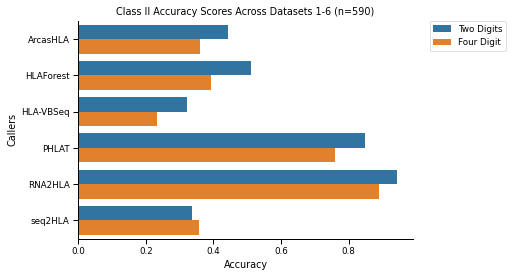

In [480]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Variable', data=df_class2)
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("Class II Accuracy Scores Across Datasets 1-6 (n=590)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/class2_accuracy.png',bbox_inches ="tight",dpi=300)

### Grouping by Resolution

In [26]:
df_classes=pd.concat([df_class1,df_class2])

In [35]:
df_classes

,Callers,Variable,Value,Class
0,arcas,Two Digits,0.993850,Class 1
1,hlaforest,Two Digits,0.984625,Class 1
2,hlavbseq,Two Digits,0.981857,Class 1
3,optitype,Two Digits,0.994465,Class 1
4,phlat,Two Digits,0.975092,Class 1
5,rna2hla,Two Digits,0.988930,Class 1
6,seq2hla,Two Digits,0.988930,Class 1
7,arcas,Four Digit,0.921587,Class 1
8,hlaforest,Four Digit,0.826261,Class 1
9,hlavbseq,Four Digit,0.898216,Class 1


In [36]:
df_classes.loc[df_classes['Variable'] == 'Four Digit']

,Callers,Variable,Value,Class
7,arcas,Four Digit,0.921587,Class 1
8,hlaforest,Four Digit,0.826261,Class 1
9,hlavbseq,Four Digit,0.898216,Class 1
10,optitype,Four Digit,0.983087,Class 1
11,phlat,Four Digit,0.885609,Class 1
12,rna2hla,Four Digit,0.960640,Class 1
13,seq2hla,Four Digit,0.960640,Class 1
6,arcas,Four Digit,0.360648,Class 2
7,hlaforest,Four Digit,0.393056,Class 2
8,hlavbseq,Four Digit,0.232407,Class 2


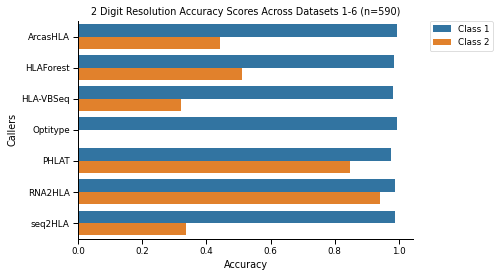

In [30]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Class', data=df_classes.loc[df_classes['Variable'] == 'Two Digits'])
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("2 Digit Resolution Accuracy Scores Across Datasets 1-6 (n=590)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/2dig_accuracy.png',bbox_inches ="tight",dpi=300)

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Class', data=df_classes.loc[df_classes['Variable'] == 'Two Digits'])
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("2 Digit Resolution Accuracy Scores Across Datasets 1-6 (n=590)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/2dig_accuracy.png',bbox_inches ="tight",dpi=300)

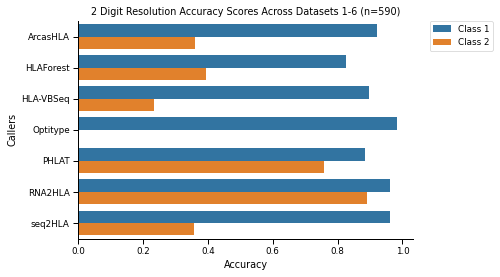

In [37]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Class', data=df_classes.loc[df_classes['Variable'] == 'Four Digit'])
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("2 Digit Resolution Accuracy Scores Across Datasets 1-6 (n=590)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/4dig_accuracy.png',bbox_inches ="tight",dpi=300)

## Class 1 & 2

In [465]:
## Class 1 & 2 
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
twodig_list=[0.9872537659327926, 0.9834878331402086, 0.955388180764774, 0.9944649446494465, 0.9727694090382387, 0.9811703360370799, 0.9640787949015064]
fourdig_list=[0.9177288528389339, 0.8250289687137891, 0.8748551564310545, 0.9830873308733087, 0.8847045191193511, 0.9458285052143685, 0.929316338354577]

In [466]:
df_caller_list=caller_list
df_twodig_list=twodig_list
df_fourdig_list=fourdig_list
df=pd.DataFrame(np.column_stack([df_caller_list,df_twodig_list,df_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df=df.melt(id_vars='Callers').rename(columns=str.title)
df['Value'] = df['Value'].astype(float)

In [242]:
df

,Callers,Variable,Value
0,arcas,Two Digits,0.987254
1,hlaforest,Two Digits,0.983488
2,hlavbseq,Two Digits,0.955388
3,optitype,Two Digits,0.994465
4,phlat,Two Digits,0.972769
5,rna2hla,Two Digits,0.981170
6,seq2hla,Two Digits,0.964079
7,arcas,Four Digit,0.917729
8,hlaforest,Four Digit,0.825029
9,hlavbseq,Four Digit,0.874855


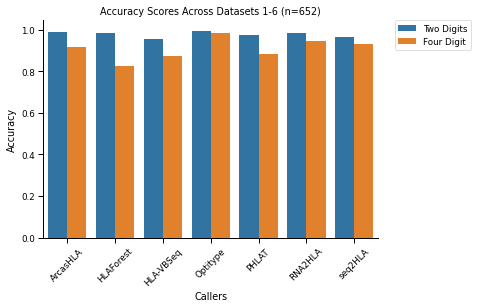

In [467]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df)
ax.set_xticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq', 'Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Scores Across Datasets 1-6 (n=652)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/accuracy.png',bbox_inches ="tight",dpi=300)

## D1 Accuracy Plot

In [17]:
d1_caller_list=caller_list
d1_twodig_list=twodig_list
d1_fourdig_list=fourdig_list
df1=pd.DataFrame(np.column_stack([d1_caller_list,d1_twodig_list,d1_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])

In [97]:
df1=df1.melt(id_vars='Tool').rename(columns=str.title)
df1['Value'] = df1['Value'].astype(float)

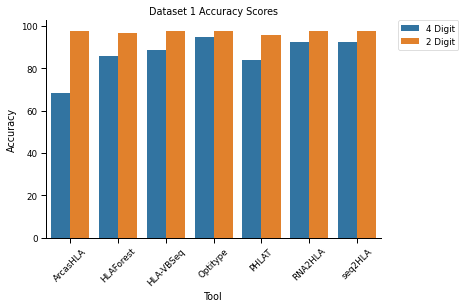

In [98]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df1)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 1 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d1_accuracy.png',bbox_inches ="tight",dpi=300)

## D2 Accuracy Plot

In [66]:
d2_caller_list=caller_list
d2_twodig_list=twodig_list
d2_fourdig_list=fourdig_list
df2=pd.DataFrame(np.column_stack([d2_caller_list,d2_twodig_list,d2_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df2=df2.melt(id_vars='Callers').rename(columns=str.title)
df2['Value'] = df2['Value'].astype(float)

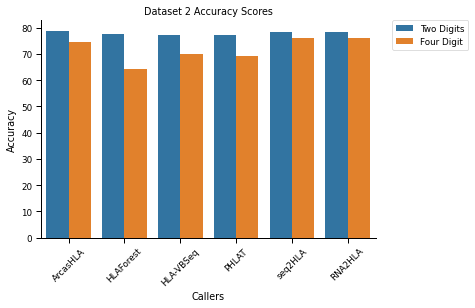

In [68]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df2)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','PHLAT','seq2HLA','RNA2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 2 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d2_accuracy.png',bbox_inches ="tight")

## D3 Accuracy Plot

In [104]:
d3_caller_list=caller_list
d3_twodig_list=twodig_list
d3_fourdig_list=fourdig_list
df3=pd.DataFrame(np.column_stack([d3_caller_list,d3_twodig_list,d3_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df3=df3.melt(id_vars='Callers').rename(columns=str.title)
df3['Value'] = df3['Value'].astype(float)

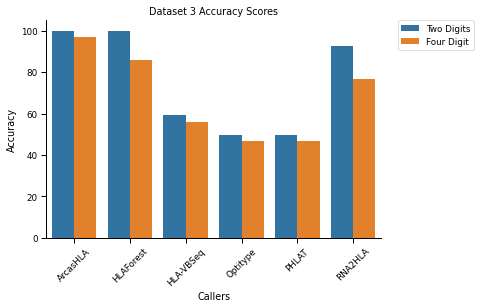

In [107]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df3)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 3 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d3_accuracy.png',bbox_inches ="tight")

## D4 Accuracy Plot

In [123]:
d4_caller_list=caller_list
d4_twodig_list=twodig_list
d4_fourdig_list=fourdig_list
df4=pd.DataFrame(np.column_stack([d4_caller_list,d4_twodig_list,d4_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df4=df4.melt(id_vars='Callers').rename(columns=str.title)
df4['Value'] = df4['Value'].astype(float)

In [126]:
df4

,Callers,Variable,Value
0,arcas,Two Digits,14.285714
1,hlaforest,Two Digits,75.000000
2,hlavbseq,Two Digits,10.714286
3,optitype,Two Digits,0.000000
4,phlat,Two Digits,0.000000
5,rna2hla,Two Digits,42.857143
6,arcas,Four Digit,14.285714
7,hlaforest,Four Digit,46.428571
8,hlavbseq,Four Digit,10.714286
9,optitype,Four Digit,0.000000


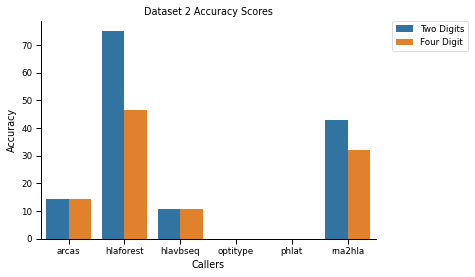

In [125]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df4)
#ax.set_xticklabels(['ArcasHLA','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 2 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d4_accuracy.png',bbox_inches ="tight")

## D5 Accuracy Plot

In [ ]:
d5_caller_list=caller_list
d5_twodig_list=twodig_list
d5_fourdig_list=fourdig_list
df5=pd.DataFrame(np.column_stack([d5_caller_list,d5_twodig_list,d5_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df6=df6.melt(id_vars='Callers').rename(columns=str.title)
df5['Value'] = df5['Value'].astype(float)

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df5)
#ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'Optitype','PHLAT','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 1 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('/content/gdrive/MyDrive/HLA_analysis/Figures/d5_accuracy.png',bbox_inches ="tight")

## D6 Accuracy Plot

In [ ]:
d6_caller_list=caller_list
d6_twodig_list=twodig_list
d6_fourdig_list=fourdig_list
df6=pd.DataFrame(np.column_stack([d6_caller_list,d6_twodig_list,d6_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df6=df6.melt(id_vars='Callers').rename(columns=str.title)
df6['Value'] = df6['Value'].astype(float)

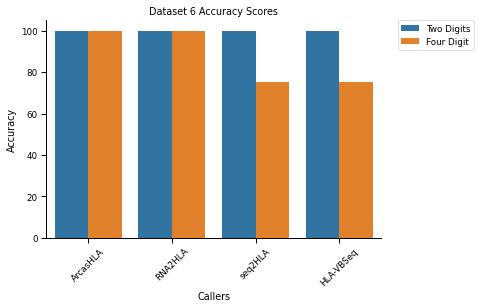

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df6)
ax.set_xticklabels(['ArcasHLA','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 6 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('/content/gdrive/MyDrive/HLA_analysis/Figures/d6_accuracy.png',bbox_inches ="tight")